In [1]:
# After finishing the first half of the project, the following part is the modeling

In [2]:
# This is the first guided capstone project
#The project is to make a recommendation to Big Mountain Resort to add additional liftchair to help distribution the visitors
# This part contains the Data Wrangling, which include the data collection, Data Organize,Data Defination and Data Clean
#The idea to improve the distribution of guest is calculate the area vs. liftchair and compare with average in the nation. s
# Part 1, Data Collection. The data file is called resort.csv and saveed in the local C drive. So use Python to read the data

#Import functions for the project
import pandas as pd
import numpy as np

#Load the pyplot collection of functions from matplotlib, as plt. This will be for the data visualization part 
import matplotlib.pyplot as plt 



In [3]:
# Data collection- Import data file resort.csv to a new DaraFrame resort_orignal and compared with original excel spreadsheet
resort_original = pd.read_csv(r"C:\\Users\\mohua\\OneDrive\\Documents\\unit6\resort.csv", index_col=None)
resort_original.shape
resort_original.head()
# The data has 330 column, 27 rows, which did not lose the data. So resort_original will be the raw data for the processing

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [4]:
# That's the end of part 1. Data Wrangling

In [5]:
# Part 2, Data organize and clean
# first check the duplicate, we found that "Region" seems to be redudant data. The 'tranms' also does not help for this project
# So drop these two columns
resort=resort_original.drop(['Region','trams','total_chairs'], axis=1)
# There is also another spelling confustion. Per information, the "Surface" represents 'single' liftchair. To make it clear, change the column index to 'single'
resort.rename(columns={'surface': 'single'}, inplace=True)
resort.head()
#Checked and looks good

# We initially want to compare the situation in Montana, but found there are only two data. So the idea is abandoned.Use the whole data
#resort_montana=resort[resort['state']=='Montana']
#resort=resort_montana
# There are some numbers,such as 0,1,2,... from csv file. To better process data, we need to eliminate that column
# The idea to eliminate that column is to switch columns and rows. Then set 0,1,2... row as index. Use row 1 to substitue index and delete one role
# Switch columns and rows and reset index
resort_T=resort.T
resort_T.index
resort_T.reset_index()
#Use the first columns to subsittue index and then drop index row
resort_T.columns = resort_T.iloc[0]
resort_T=resort_T.drop(resort_T.index[0])
#Checked and looked good and then switch back to resort
resort=resort_T.T
resort.shape

(330, 23)

In [6]:
# The data has been checked again to ensure that there is no missing data 
resort.count()
# Apparantly, there are missing data, such as fastEight,TerrainParks, LogestRun_mi,etc..

state                330
summit_elev          330
vertical_drop        330
base_elev            330
fastEight            164
fastSixes            330
fastQuads            330
quad                 330
triple               330
double               330
single               330
Runs                 326
TerrainParks         279
LongestRun_mi        325
SkiableTerrain_ac    327
Snow Making_ac       284
daysOpenLastYear     279
yearsOpen            329
averageSnowfall      316
AdultWeekday         276
AdultWeekend         279
projectedDaysOpen    283
NightSkiing_ac       187
dtype: int64

In [7]:
# Use a simple command to drop the results with missing value and reset to the resort_clean
resort_clean=resort.dropna()
resort_clean.shape
resort_clean.count()
#Looks good. There are 41 data for the future analysis (24 columns and 41 rows)

state                41
summit_elev          41
vertical_drop        41
base_elev            41
fastEight            41
fastSixes            41
fastQuads            41
quad                 41
triple               41
double               41
single               41
Runs                 41
TerrainParks         41
LongestRun_mi        41
SkiableTerrain_ac    41
Snow Making_ac       41
daysOpenLastYear     41
yearsOpen            41
averageSnowfall      41
AdultWeekday         41
AdultWeekend         41
projectedDaysOpen    41
NightSkiing_ac       41
dtype: int64

In [8]:
#check column name
resort_clean.head()
resort_clean.shape
#(column 41, rows 24)
resort_clean.dtypes
# all data type are object,try to change some to the int
cols_int= ['fastEight','fastSixes', 'fastQuads', 'quad', 'triple',
        'double', 'single','Runs','TerrainParks','daysOpenLastYear','yearsOpen','AdultWeekday',
        'AdultWeekend','projectedDaysOpen']
resort_clean[cols_int] = resort_clean[cols_int].astype(int)
# all data type are object,try to change some to the float
cols_float = ['summit_elev', 'vertical_drop', 'base_elev','LongestRun_mi','SkiableTerrain_ac','Snow Making_ac',
              'averageSnowfall','NightSkiing_ac']
resort_clean[cols_float] = resort_clean[cols_float].astype(float)
# state should be string
cols_str=['state']
resort_clean[cols_str]=resort_clean[cols_str].astype(str)

#resort_clean['summit_elev']=resort_clean.summit_elev.astype('int64')

resort_clean.dtypes

C:\Users\mohua\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


state                 object
summit_elev          float64
vertical_drop        float64
base_elev            float64
fastEight              int32
fastSixes              int32
fastQuads              int32
quad                   int32
triple                 int32
double                 int32
single                 int32
Runs                   int32
TerrainParks           int32
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear       int32
yearsOpen              int32
averageSnowfall      float64
AdultWeekday           int32
AdultWeekend           int32
projectedDaysOpen      int32
NightSkiing_ac       float64
dtype: object

In [9]:
# The following part is to explore the data. There are several steps to explore data
# 1. Exploration of each individual variable
# 2. Assessment of the relationship between each variable and the target variable
# 3. Assessment of the interaction between variables
# 4. Exploration of data across many dimensions
# The useful data will be name of resort, the elevation change,total fast liftchair vs. regular liftchair in the point of
# capacity, number of Terriain Parks, longest/shortest Run miles area of the resort
# To do this, the data will be further organized
# Slice the Elevation data
Elevation_summit_resort=resort_clean['summit_elev']
Elevation_summit_resort.head()
# Calculate the fast liftchair capacity
resort_clean['Fast_liftchair_capacity']= 8*resort_clean.fastEight+6*resort_clean.fastSixes+4*resort_clean.fastQuads
# Claculate the regular liftchair capacity
resort_clean['Regular_liftchair_capacity']= 4*resort_clean.quad+3*resort_clean.triple+2*resort_clean.double+resort_clean.single
resort_clean.count()

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


state                         41
summit_elev                   41
vertical_drop                 41
base_elev                     41
fastEight                     41
fastSixes                     41
fastQuads                     41
quad                          41
triple                        41
double                        41
single                        41
Runs                          41
TerrainParks                  41
LongestRun_mi                 41
SkiableTerrain_ac             41
Snow Making_ac                41
daysOpenLastYear              41
yearsOpen                     41
averageSnowfall               41
AdultWeekday                  41
AdultWeekend                  41
projectedDaysOpen             41
NightSkiing_ac                41
Fast_liftchair_capacity       41
Regular_liftchair_capacity    41
dtype: int64

In [10]:
# drop individual liftchair
resort_EDA=resort_clean.drop(['vertical_drop','base_elev','fastEight','fastSixes','fastQuads','quad','triple','double','single'], axis=1)

In [11]:
# Investigate the individual Variable
# The total Skiable area in the acres and sort the data by descending
Total_Skiable_acres=resort_EDA['SkiableTerrain_ac']
Total_Skiable_acres_sorted=Total_Skiable_acres.sort_values(ascending=False)
Total_Skiable_acres_sorted.head()
# Therefore the Big Mountain Resort is the largest resort with skiable area, almost double than the size of the second on

Name
Big Mountain Resort      3000.0
Alyeska Resort           1610.0
Great Divide             1600.0
Silver Mountain          1600.0
Pebble Creek Ski Area    1100.0
Name: SkiableTerrain_ac, dtype: float64

In [12]:
#The total area covered by snow making machine
Snow_making_area=resort_EDA['Snow Making_ac']
Snow_making_area_sorted=Snow_making_area.sort_values(ascending=False)
Snow_making_area_sorted.head()
# The Big Mountain Resort also has the largest snow making area when compared with fourth and fiveth place. Also double

Name
Big Mountain Resort    600.0
Sunday River           552.0
Bretton Woods          427.0
Windham Mountain       280.0
Afton Alps             250.0
Name: Snow Making_ac, dtype: float64

In [13]:
# Analyze the Runs perday
Runs_per_day=resort_EDA['Runs']
Runs_per_day_sorted=Runs_per_day.sort_values(ascending=False)
Runs_per_day_sorted.head()
# The higher runs per day number indicated that Big Mountain Resort is very busy with a high running speed for the liftchair
Average_Run_per_day=Runs_per_day.mean()
print(Average_Run_per_day)
# The current run per day for Big Mountain Resort (105 Runs per day) is much higher than the average Runs Per day (39.2 Runs per day)

39.21951219512195


In [14]:
# night skiing area
night_ski_area=resort_EDA['NightSkiing_ac']
night_ski_area_sorted=night_ski_area.sort_values(ascending=False)
night_ski_area_sorted.head()
# It also has the largest night_ski-area

Name
Big Mountain Resort     600.0
Alyeska Resort          550.0
Afton Alps              250.0
Greek Peak              175.0
Blue Mountain Resort    164.0
Name: NightSkiing_ac, dtype: float64

In [15]:
# The above data showed the current situation of Big Mountain Resort. The largest area with snow and night ski area. 
# How about liftchair capacity - fast vs regular and total capacity of the liftchairs
Fast_chair_capacity=resort_EDA['Fast_liftchair_capacity']
Fast_chair_capacity_sorted=Fast_chair_capacity.sort_values(ascending=False)
Fast_chair_capacity_sorted.head()
# There are 12 seats in the fast liftchair
Regular_chair_capacity=resort_EDA['Regular_liftchair_capacity']
Regular_chair_capacity_sorted=Regular_chair_capacity.sort_values(ascending=False)
Regular_chair_capacity_sorted.head()
# Big Mountain Resort has 29 seats in the regular liftchair
# Total chair capacity for the resort
Total_chair_capacity=Fast_chair_capacity+Regular_chair_capacity
Total_chair_capacity_sorted=Total_chair_capacity.sort_values(ascending=False)
Total_chair_capacity_sorted.head()
# The Big Mountain Resort has 41 seats

Name
Sunday River            48
Afton Alps              45
Big Mountain Resort     41
Blue Mountain Resort    32
Windham Mountain        30
dtype: int32

In [16]:
# That's all for step 3. steps is to process data and see the potential relationship between variables.
# What did data tell us: Big Mountain Resort is large. There are many liftchair there. The next question is why additional lifechair is needed

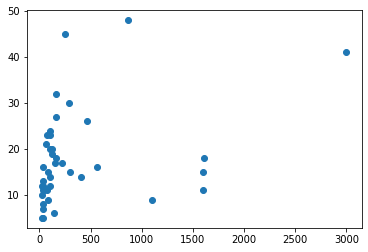

In [17]:
#The following is the modeling
# The total Skiable area in the acres vs. total chair capacities
frames = [Total_Skiable_acres, Total_chair_capacity]
Total_Skiable_acres_to_chair=pd.concat(frames,axis=1)
Total_Skiable_acres_to_chair.columns =['Total_Skiable_acres', 'Total_chair_capacities'] 
Total_Skiable_acres_to_chair.head()
# The total skiable area contained Name of Resort, The Total Skiable area,total chair capacities
Total_Skiable_acres_to_chair_T=Total_Skiable_acres_to_chair.T
Total_Skiable_acres_to_chair_T.index
Total_Skiable_acres_to_chair_T.reset_index()
#Use the first columns to subsittue index and then drop index row
Total_Skiable_acres_to_chair_T.columns =Total_Skiable_acres_to_chair_T.iloc[0]
Total_Skiable_acres_to_chair_T=Total_Skiable_acres_to_chair_T.drop(Total_Skiable_acres_to_chair_T.index[0])
#Checked and looked good and then switch back to resort
Total_Skiable_acres_to_chair_plot=Total_Skiable_acres_to_chair_T.T
Total_Skiable_acres_to_chair_plot.head()
#setup the scatter plot 
xs=Total_Skiable_acres_to_chair['Total_Skiable_acres']
ys=Total_Skiable_acres_to_chair['Total_chair_capacities']
plt.plot(xs,ys,'o',alpha=1)
# Plot showed that Big Mountain Resort out


averaage_distribution(chair/acre)= 20.747974250113952


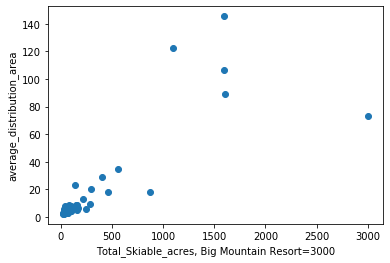

In [18]:
# Compare with the average area covered by per chair capacity. The lower number indicated a betrer distribution of the visitor
# 3000 data corresponds to the Big Mountain
xs=Total_Skiable_acres_to_chair['Total_Skiable_acres']
ys=xs/Total_Skiable_acres_to_chair['Total_chair_capacities']
average_distribution_area=ys.mean()
print('averaage_distribution(chair/acre)=',average_distribution_area)
plt.plot(xs,ys,'o',alpha=1)
plt.xlabel('Total_Skiable_acres, Big Mountain Resort=3000')
plt.ylabel('average_distribution_area')
plt.show()
# Results showed that the average area covered by one chair is around 20.4 acres. The Big Mountain Resort is 60 acres / chair
# Ths number is much higher than avearge number. The graph showed that majority of the area covered by chair is less than 40 
# To compensate the low coverage of the chair, the liftchair will need run much faster
# Therefore the total Runs of the Big Mountains should be more than average average

averaage_runs_perday= 39.21951219512195


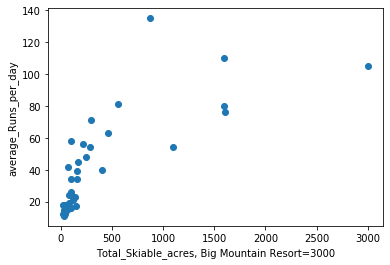

In [19]:
# To test the hypothesis, a total run will be investigated
xs=Total_Skiable_acres
ys=Runs_per_day
average_Runs_perday=ys.mean()
print('averaage_runs_perday=',average_Runs_perday)
plt.plot(xs,ys,'o',alpha=1)
plt.xlabel('Total_Skiable_acres, Big Mountain Resort=3000')
plt.ylabel('average_Runs_per_day')
plt.show()
# Results showed that the average runs per day covered by all liftchair is around 39. The Big Mountain Resort is 105 
# Ths number is much higher than avearge number, which indicated that it runs faster. To compensate the low coverage of the chair, the liftchair will need run much faster
# Therefore the total Runs of the Big Mountains should be more than average average

averaage_snow_making_area_by_chair(chair/acre)= 7.055659392666297


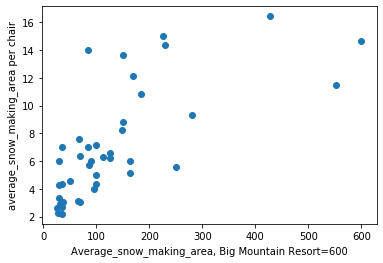

In [20]:
# Use the similiar method to investigate the snow making area
#Compare with the average area covered by per chair capacity. The lower number indicated a betrer distribution of the visitor
# 3000 data corresponds to the Big Mountain
xs=Snow_making_area
ys=xs/Total_chair_capacity
average_snow_making_area=ys.mean()
print('averaage_snow_making_area_by_chair(chair/acre)=',average_snow_making_area)
plt.plot(xs,ys,'o',alpha=1)
plt.xlabel('Average_snow_making_area, Big Mountain Resort=600')
plt.ylabel('average_snow_making_area per chair')
plt.show()
# Results showed that the average area covered by one chair is around 7 acres. The Big Mountain Resort is 15 acres / chair
# Ths number is much higher than avearge number. This also confirmed that there maybe the issues in the distribution of visitors
# Check the night skiing and see

night_ski_area_by_chair(chair/acre)= 5.748776518966992


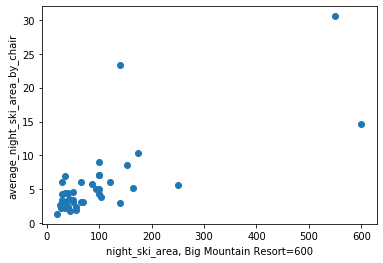

In [21]:
# Use the similiar method to investigate the night skiing area
#Compare with the average area covered by per chair capacity. The lower number indicated a betrer distribution of the visitor
# 3000 data corresponds to the Big Mountain
xs=night_ski_area
ys=xs/Total_chair_capacity
average_night_ski_area_by_chair=ys.mean()
print('night_ski_area_by_chair(chair/acre)=',average_night_ski_area_by_chair)
plt.plot(xs,ys,'o',alpha=1)
plt.xlabel('night_ski_area, Big Mountain Resort=600')
plt.ylabel('average_night_ski_area_by_chair')
plt.show()
# Results showed that the average area covered by one chair is around 5 acres. The Big Mountain Resort is 13 acres / chair
# Ths number is much higher than avearge number. This also confirmed that there maybe the issues in the distribution of visitors

In [22]:
# We checked total area of resort,snow making area, night ski area covered by per chair
# After compared the Big Mountain Resort data to the average, the distribution of visitors is higher than average value within the 44 resorts
# The insufficient distribution of visitors will cause faster runs of the liftchair, which will have more runs per day. 
#The data analysis confirmed all the hypothesis

In [23]:
# After we confirmed the issue of distribution visitors, we will move forward to predict the chairs to be added
# Suppose we will improve the distribution of the vistors
# We will first to setup a model to analyze the data. Then use regressions to predict how many chair will be needed

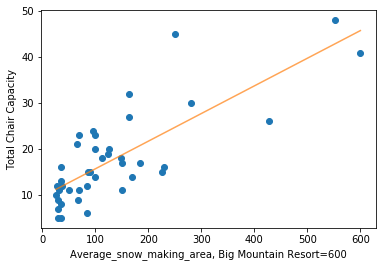

estimated chairs in Big Mountain Resort= 45.771022798699555


In [24]:
# Setup model
#import statsmodels.formula.api as smf
#from scipy.stats import linregress
from scipy.stats import linregress
import statsmodels.formula.api as smf
xs=Snow_making_area
ys=Total_chair_capacity
res = linregress(xs,ys)
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=1)
# Plot the line of best fit
fx = np.array([xs.min(),xs.max()])
fy = res.intercept+res.slope*fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Average_snow_making_area, Big Mountain Resort=600')
plt.ylabel('Total Chair Capacity')
plt.show()

fx=600
fy= res.intercept+res.slope*fx
print ('estimated chairs in Big Mountain Resort=', fy)
#The estimated chair under this condition will be 46 chairs. 
#Currently, Big Mountain has 41 chairs. So 4 more chair will be needed

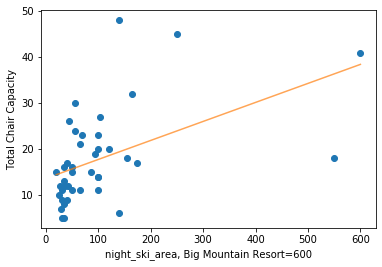

estimated chairs in Big Mountain Resort= 38.41799913225297


In [25]:
# Setup model-night skiing area

xs=night_ski_area
ys=Total_chair_capacity
res = linregress(xs,ys)
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=1)
# Plot the line of best fit
fx = np.array([xs.min(),xs.max()])
fy = res.intercept+res.slope*fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('night_ski_area, Big Mountain Resort=600')
plt.ylabel('Total Chair Capacity')
plt.show()

fx=600
fy= res.intercept+res.slope*fx
print ('estimated chairs in Big Mountain Resort=', fy)
# Night Skiing results indicated that Big Mountain Resort needs additional chair if only consider the visitors for night ski
# The projected chairs is 39, while Big Mountain is having 41 chairs


In [27]:
# Since the snow making area results support adding more liftchair
# and night ski result did not support
# We will use multivariation statistical model to see whehter Big Mountain Resort really need 
# additional liftchain under night_ski,snow_making_area
from scipy.stats import linregress
import statsmodels.formula.api as smf
frames = [Snow_making_area,night_ski_area, Total_chair_capacity]
subset=pd.concat(frames,axis=1)
subset.columns =['Snow_making_area','night_ski_area', 'Total_chair_capacities'] 
subset.head()

#Run regression with StatsModels
results = smf.ols('Total_chair_capacities ~ Snow_making_area+night_ski_area', data = subset).fit()
print(results.params)
df = pd.DataFrame()
df['night_ski_area']=np.linspace(100,600)
df['Snow_making_area']=600
pred = results.predict(df)
print(pred.head())
# The results indicated that 
# 1) Snow making area will contribute more to the total chairs. The coefficient is 0.055 for snow making area vs. night ski area (0,01)
# The model predicted that Big Mountain needs 45 chairs. Currently there are only 41 chairs. So at least 4 chairs will be needed 

Intercept           9.306628
Snow_making_area    0.055338
night_ski_area      0.010214
dtype: float64
0    43.530994
1    43.635216
2    43.739439
3    43.843662
4    43.947884
dtype: float64


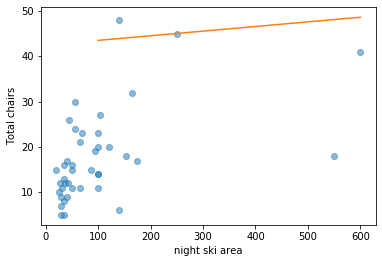

In [31]:
# The project night ski vs. total chair is plotted and compare with original data
# plot the snow making 600 acres, the total chair need for the night ski 
plt.plot(night_ski_area,Total_chair_capacity,'o',alpha=0.5)

plt.plot(df['night_ski_area'], pred, label='Age 30')

# Label axes
plt.xlabel('night ski area')
plt.ylabel('Total chairs')
plt.show()

In [ ]:
#output the data file to review
resort_clean.to_csv(r"C:\\Users\\mohua\\OneDrive\\Documents\\unit6\resort_clean.csv")
resort_EDA.to_csv(r"C:\\Users\\mohua\\OneDrive\\Documents\\unit6\resort_EDA.csv")